In [1]:
import pandas as pd

In [2]:
data= pd.read_csv('cleaned_football_data.csv')
data

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Attendance
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,4.0,13.0,12.0,6.0,6.0,1.0,2.0,0.0,0.0,20043
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,5.0,19.0,14.0,7.0,7.0,1.0,2.0,0.0,0.0,34914
2,2000-08-19,Sunderland,Arsenal,1.0,0.0,H,0.0,0.0,D,Steve Dunn,...,7.0,10.0,21.0,2.0,9.0,3.0,1.0,0.0,1.0,46346
3,2000-08-19,Tottenham,Ipswich,3.0,1.0,H,2.0,1.0,H,Alan Wiley,...,5.0,14.0,13.0,3.0,4.0,0.0,0.0,0.0,0.0,36148
4,2000-08-19,Liverpool,Bradford,1.0,0.0,H,0.0,0.0,D,Paul Durkin,...,2.0,8.0,8.0,6.0,1.0,1.0,1.0,0.0,0.0,44183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,2025-02-15,Fulham,Nott'm Forest,2.0,1.0,H,1.0,1.0,D,T Bramall,...,2.0,13.0,8.0,8.0,4.0,0.0,0.0,0.0,0.0,32910
8941,2025-02-15,Crystal Palace,Everton,1.0,2.0,A,0.0,1.0,A,A Taylor,...,6.0,9.0,12.0,6.0,2.0,0.0,1.0,0.0,0.0,32910
8942,2025-02-15,Leicester,Arsenal,0.0,2.0,A,0.0,0.0,D,S Barrott,...,5.0,9.0,10.0,3.0,7.0,2.0,1.0,0.0,0.0,32910
8943,2025-02-16,Liverpool,Wolves,2.0,1.0,H,2.0,0.0,H,S Hooper,...,4.0,15.0,13.0,4.0,3.0,2.0,2.0,0.0,0.0,32910


In [3]:
data.dtypes

Date           object
HomeTeam       object
AwayTeam       object
FTHG          float64
FTAG          float64
FTR            object
HTHG          float64
HTAG          float64
HTR            object
Referee        object
HS            float64
AS            float64
HST           float64
AST           float64
HF            float64
AF            float64
HC            float64
AC            float64
HY            float64
AY            float64
HR            float64
AR            float64
Attendance      int64
dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [5]:
data['HomeTeam_encoded'] = le.fit_transform(data['HomeTeam'])
data['AwayTeam_encoded'] = le.fit_transform(data['AwayTeam'])
data['FTR_encoded'] = data['FTR'].map({'H': 1, 'D': 0, 'A': -1})
data['HTR_encoded'] = data['HTR'].map({'H': 1, 'D': 0, 'A': -1})


In [6]:
# Calculate home team win rate
home_win_rate = data.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').mean()).to_dict()
data['HomeTeam_encoded'] = data['HomeTeam'].map(home_win_rate)

# Calculate away team win rate
away_win_rate = data.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'A').mean()).to_dict()
data['AwayTeam_encoded'] = data['AwayTeam'].map(away_win_rate)

In [7]:
data.drop(columns=['FTR', 'HTR', 'Referee'], inplace=True)
data.isnull().sum()

Date                0
HomeTeam            0
AwayTeam            0
FTHG                0
FTAG                0
HTHG                0
HTAG                0
HS                  0
AS                  0
HST                 0
AST                 0
HF                  0
AF                  0
HC                  0
AC                  0
HY                  0
AY                  0
HR                  0
AR                  0
Attendance          0
HomeTeam_encoded    0
AwayTeam_encoded    0
FTR_encoded         0
HTR_encoded         0
dtype: int64

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday  # Monday=0, ..., Saturday=5, Sunday=6
data['WeekOfYear'] = data['Date'].dt.isocalendar().week

In [9]:
data.dtypes

Date                datetime64[ns]
HomeTeam                    object
AwayTeam                    object
FTHG                       float64
FTAG                       float64
HTHG                       float64
HTAG                       float64
HS                         float64
AS                         float64
HST                        float64
AST                        float64
HF                         float64
AF                         float64
HC                         float64
AC                         float64
HY                         float64
AY                         float64
HR                         float64
AR                         float64
Attendance                   int64
HomeTeam_encoded           float64
AwayTeam_encoded           float64
FTR_encoded                  int64
HTR_encoded                  int64
Year                         int32
Month                        int32
Day                          int32
Weekday                      int32
WeekOfYear          

In [10]:
import pandas as pd
import numpy as np

# Sort data by date
data = data.sort_values(by="Date")

# Function to calculate rolling averages per team
def compute_rolling_avg(data, team_column, stat_column, new_col_name, window=5):
    rolling_avg = (
        data.groupby(team_column)[stat_column]
        .rolling(window, min_periods=1)
        .mean()
        .reset_index(level=0, drop=True)
    )
    data[new_col_name] = rolling_avg
    return data

# Compute rolling averages for key stats
data = compute_rolling_avg(data, "HomeTeam_encoded", "FTHG", "Last_5_HomeGoals_Avg")
data = compute_rolling_avg(data, "AwayTeam_encoded", "FTAG", "Last_5_AwayGoals_Avg")
data = compute_rolling_avg(data, "HomeTeam_encoded", "HS", "Last_5_HomeShots_Avg")
data = compute_rolling_avg(data, "AwayTeam_encoded", "AS", "Last_5_AwayShots_Avg")

# Function to track consecutive wins
def win_streak(data, team_column, result_column, win_value):
    streaks = []
    streak = 0
    for result in data[result_column]:
        if result == win_value:
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

# Compute win streaks for home (win = 2) and away (win = 0)
data["HomeWinStreak"] = (
    data.groupby("HomeTeam_encoded", group_keys=False)
    .apply(lambda x: win_streak(x, "HomeTeam_encoded", "FTR_encoded", 2))
    .reset_index(drop=True)
)
data["AwayWinStreak"] = (
    data.groupby("AwayTeam_encoded", group_keys=False)
    .apply(lambda x: win_streak(x, "AwayTeam_encoded", "FTR_encoded", 0))
    .reset_index(drop=True)
)


# Compute home & away win rates over the season
data["HomeWinRate"] = data.groupby("HomeTeam_encoded")["FTR_encoded"].apply(lambda x: (x == 2).expanding().mean()).reset_index(level=0, drop=True)
data["AwayWinRate"] = data.groupby("AwayTeam_encoded")["FTR_encoded"].apply(lambda x: (x == 0).expanding().mean()).reset_index(level=0, drop=True)

# Head-to-head results: Last 5 meetings where HomeTeam won
def compute_h2h(data, home_team, away_team):
    h2h_wins = data.groupby([home_team, away_team])["FTR_encoded"].apply(lambda x: (x == 2).rolling(5, min_periods=1).sum()).reset_index(level=[0, 1], drop=True)
    data["H2H_HomeWins"] = h2h_wins
    return data

data = compute_h2h(data, "HomeTeam_encoded", "AwayTeam_encoded")

# Fill missing values with 0
data.fillna(0, inplace=True)

# Show the final dataframe with new features
print(data.head())


/tmp/ipykernel_9755/2692150549.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: win_streak(x, "HomeTeam_encoded", "FTR_encoded", 2))
/tmp/ipykernel_9755/2692150549.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: win_streak(x, "AwayTeam_encoded", "FTR_encoded", 0))


        Date    HomeTeam  AwayTeam  FTHG  FTAG  HTHG  HTAG    HS    AS   HST  \
0 2000-08-19    Charlton  Man City   4.0   0.0   2.0   0.0  17.0   8.0  14.0   
1 2000-08-19     Chelsea  West Ham   4.0   2.0   1.0   0.0  17.0  12.0  10.0   
2 2000-08-19  Sunderland   Arsenal   1.0   0.0   0.0   0.0   8.0  14.0   2.0   
3 2000-08-19   Tottenham   Ipswich   3.0   1.0   2.0   1.0  20.0  15.0   6.0   
4 2000-08-19   Liverpool  Bradford   1.0   0.0   0.0   0.0  16.0   3.0  10.0   

   ...  WeekOfYear  Last_5_HomeGoals_Avg  Last_5_AwayGoals_Avg  \
0  ...          33                   4.0                   0.0   
1  ...          33                   4.0                   2.0   
2  ...          33                   1.0                   0.0   
3  ...          33                   3.0                   1.0   
4  ...          33                   1.0                   0.0   

   Last_5_HomeShots_Avg  Last_5_AwayShots_Avg  \
0                  17.0                   8.0   
1                  17.0 

In [11]:
data["HomeWinStreak"] = data["HomeWinStreak"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 0)
data["AwayWinStreak"] = data["AwayWinStreak"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 0)

In [12]:
data = data.drop(columns=["HomeWinStreak", "AwayWinStreak"])

In [13]:
# Check missing values
print("Missing values:\n", data.isnull().sum())

# Check data types
print("\nData types:\n", data.dtypes)

Missing values:
 Date                    0
HomeTeam                0
AwayTeam                0
FTHG                    0
FTAG                    0
HTHG                    0
HTAG                    0
HS                      0
AS                      0
HST                     0
AST                     0
HF                      0
AF                      0
HC                      0
AC                      0
HY                      0
AY                      0
HR                      0
AR                      0
Attendance              0
HomeTeam_encoded        0
AwayTeam_encoded        0
FTR_encoded             0
HTR_encoded             0
Year                    0
Month                   0
Day                     0
Weekday                 0
WeekOfYear              0
Last_5_HomeGoals_Avg    0
Last_5_AwayGoals_Avg    0
Last_5_HomeShots_Avg    0
Last_5_AwayShots_Avg    0
HomeWinRate             0
AwayWinRate             0
H2H_HomeWins            0
dtype: int64

Data types:
 Date                

In [14]:
print(data["FTR_encoded"].value_counts())

FTR_encoded
 1    4104
-1    2649
 0    2192
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=["FTR_encoded", "Date", "HomeTeam", "AwayTeam"])  # Remove non-numeric columns
y = data["FTR_encoded"]

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (7156, 32)
Testing set size: (1789, 32)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
# Identify datetime columns
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical features (e.g., timestamp)
for col in datetime_columns:
    X_train[col] = X_train[col].astype('int64')  # Convert to timestamp
    X_test[col] = X_test[col].astype('int64')

# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9893795416433762
Classification Report:
               precision    recall  f1-score   support

          -1       0.99      1.00      0.99       565
           0       0.99      0.96      0.98       412
           1       0.99      1.00      0.99       812

    accuracy                           0.99      1789
   macro avg       0.99      0.99      0.99      1789
weighted avg       0.99      0.99      0.99      1789



In [17]:
import pandas as pd
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


                 Feature  Importance
0                   FTHG    0.267602
1                   FTAG    0.245053
19           HTR_encoded    0.063482
2                   HTHG    0.042044
3                   HTAG    0.038121
25  Last_5_HomeGoals_Avg    0.029399
26  Last_5_AwayGoals_Avg    0.026097
6                    HST    0.024712
30           AwayWinRate    0.023253
7                    AST    0.019336
18      AwayTeam_encoded    0.018741
28  Last_5_AwayShots_Avg    0.017320
17      HomeTeam_encoded    0.017248
27  Last_5_HomeShots_Avg    0.016810
5                     AS    0.016159
4                     HS    0.014092
22                   Day    0.013602
20                  Year    0.012639
24            WeekOfYear    0.012437
10                    HC    0.011862
8                     HF    0.011740
9                     AF    0.011642
11                    AC    0.010115
21                 Month    0.008307
13                    AY    0.008029
12                    HY    0.007903
2

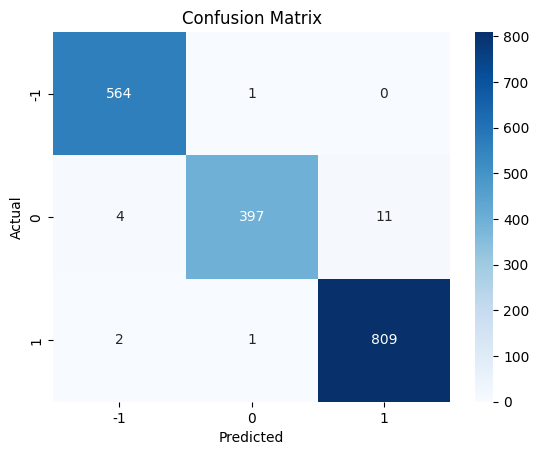

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
data.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS',
       'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR',
       'Attendance', 'HomeTeam_encoded', 'AwayTeam_encoded', 'FTR_encoded',
       'HTR_encoded', 'Year', 'Month', 'Day', 'Weekday', 'WeekOfYear',
       'Last_5_HomeGoals_Avg', 'Last_5_AwayGoals_Avg', 'Last_5_HomeShots_Avg',
       'Last_5_AwayShots_Avg', 'HomeWinRate', 'AwayWinRate', 'H2H_HomeWins'],
      dtype='object')

In [20]:
# Find unique teams and their encoded values
unique_teams = data[['HomeTeam', 'HomeTeam_encoded']].drop_duplicates()
print(unique_teams)


              HomeTeam  HomeTeam_encoded
0             Charlton          0.405405
1              Chelsea          0.632287
2           Sunderland          0.304511
3            Tottenham          0.593750
4            Liverpool          0.653933
5            Leicester          0.404167
6                Leeds          0.366412
7                Derby          0.245614
8             Coventry          0.210526
9           Man United          0.681514
10             Arsenal          0.677130
11       Middlesbrough          0.358824
12             Ipswich          0.352941
13            Bradford          0.210526
18            Man City          0.660422
16             Everton          0.472160
17           Newcastle          0.469438
14         Southampton          0.368243
15            West Ham          0.410194
28         Aston Villa          0.392308
393             Bolton          0.379679
394          Blackburn          0.427807
395             Fulham          0.425397
779         Birm

In [21]:
unique_teams_away = data[['AwayTeam', 'AwayTeam_encoded']].drop_duplicates()
print(unique_teams_away)


              AwayTeam  AwayTeam_encoded
0             Man City          0.468531
1             West Ham          0.245742
2              Arsenal          0.464286
3              Ipswich          0.280000
4             Bradford          0.052632
5          Aston Villa          0.273657
6              Everton          0.264574
7          Southampton          0.244898
8        Middlesbrough          0.183432
9            Newcastle          0.260976
10           Liverpool          0.481069
11           Tottenham          0.356502
12          Man United          0.504484
13             Chelsea          0.491071
18          Sunderland          0.172932
16            Charlton          0.230088
17               Derby          0.087719
14            Coventry          0.210526
15           Leicester          0.279661
25               Leeds          0.338462
386          Blackburn          0.260638
382             Bolton          0.227513
389             Fulham          0.166134
761          Wes

In [25]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Create a dictionary to store feature values for prediction
data_dict = {
    "HomeTeam_encoded": [0.677130],  # Arsenal at home
    "AwayTeam_encoded": [0.491071],  # Chelsea away
    "Last_5_HomeGoals_Avg": [X["Last_5_HomeGoals_Avg"].mean()],  
    "Last_5_AwayGoals_Avg": [X["Last_5_AwayGoals_Avg"].mean()],
    "Last_5_HomeShots_Avg": [X["Last_5_HomeShots_Avg"].mean()],
    "Last_5_AwayShots_Avg": [X["Last_5_AwayShots_Avg"].mean()],
    "HomeWinRate": [X["HomeWinRate"].mean()],
    "AwayWinRate": [X["AwayWinRate"].mean()],
    "H2H_HomeWins": [X["H2H_HomeWins"].mean()]
}

# Ensure all required columns exist in data_dict
for col in X.columns:
    if col not in data_dict:
        data_dict[col] = [X[col].mean()]  # Fill missing features with mean values

# Create DataFrame for prediction
arsenal_vs_chelsea = pd.DataFrame(data_dict, columns=X.columns)

# Make the prediction
prediction = clf.predict(arsenal_vs_chelsea)

# Print the prediction result
outcome_map = {1: "Arsenal Win", 0: "Draw", -1: "Chelsea Win"}
print(f"Predicted outcome: {outcome_map[prediction[0]]}")


Predicted outcome: Arsenal Win
